In [1]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from core.models import MNISTDense
from core.initializers import He, Xavier
from core.optimizers import GradDesc
from core.layers import Dense
from core.losses import Crossentropy
from core.activations import ReLu, Softmax

## Считывание данных из бинарных файлов

In [3]:
project_path =  Path.cwd().parent
data_path = project_path / "data"
preproc_path = data_path / "preprocessed"

source_train_im_path = preproc_path / "train-images-idx3-ubyte.bin"
source_train_l_path = preproc_path / "train-labels-idx1-ubyte.bin"
source_test_im_path = preproc_path / "t10k-images-idx3-ubyte.bin"
source_test_l_path = preproc_path / "t10k-labels-idx1-ubyte.bin"


### Обучающая выборка

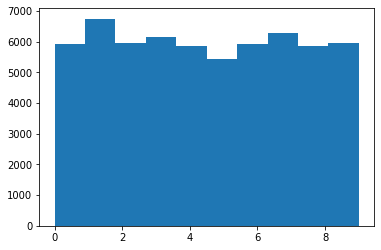

In [4]:
# Метки обуающей выборки
train_labels = np.fromfile(source_train_l_path, dtype=np.uint8, offset=8)
plt.hist(train_labels);

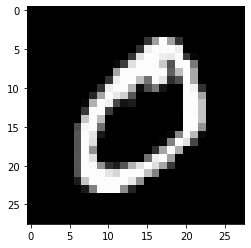

In [5]:
# Изображения обучающей выборки
train_size, rows, columns = 60000, 28, 28
train_images = np.fromfile(source_train_im_path, dtype=np.uint8, offset=16).reshape((train_size, rows, columns))
plt.imshow(train_images[1,:,:], cmap='gray')

### Тестовая выборка

In [6]:
# Метки тестовой выборки
# test_labels = np.fromfile(source_test_l_path, dtype=np.uint8, offset=8)
# plt.hist(test_labels);

In [7]:
# Изображения тестовой выборки
# test_size, rows, columns = 10000, 28, 28
# test_images = np.fromfile(source_test_im_path, dtype=np.uint8, offset=16).reshape((test_size, rows, columns))
# plt.imshow(test_images[1,:,:], cmap='gray')

## Создадим модель 

In [11]:
n_train = 60000
n_classes = 10
prepared_labels = train_labels[:n_train]
prepared_images = train_images[:n_train].reshape(n_train, -1)
prepared_images = (prepared_images > 0).astype(np.uint8)

In [12]:
model = MNISTDense(
    input_size=28*28,
    layers_sizes=[64, 32, 10],
    initializers_classes=[He, He, Xavier],
    activations_classes=[ReLu, ReLu, Softmax],
    optimizer=GradDesc(0.00001),
    loss=Crossentropy
)

In [13]:
history = model.fit(10, 32, prepared_images, prepared_labels)

By epoch progress


  0%|          | 0/10 [00:00<?, ?it/s]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mNo implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 2d, A), Tuple(array(int64, 1d, C), array(uint8, 1d, C)))
 
There are 22 candidate implementations:
[1m  - Of which 20 did not match due to:
  Overload of function 'getitem': File: <numerous>: Line N/A.
    With argument(s): '(array(float64, 2d, A), Tuple(array(int64, 1d, C), array(uint8, 1d, C)))':[0m
[1m   No match.[0m
[1m  - Of which 2 did not match due to:
  Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 162.
    With argument(s): '(array(float64, 2d, A), Tuple(array(int64, 1d, C), array(uint8, 1d, C)))':[0m
[1m   Rejected as the implementation raised a specific error:
     NotImplementedError: only one advanced index supported[0m
  raised from /usr/local/lib/python3.8/dist-packages/numba/core/typing/arraydecl.py:65
[0m
[0m[1mDuring: typing of intrinsic-call at /home/stepan/MIPT/second_sem/DeepLearning/handmade_nn/notebooks/../core/losses.py (20)[0m
[1m
File "../core/losses.py", line 20:[0m
[1m    def calc(prediction: np.ndarray, target: np.ndarray) -> np.float32:
        <source elided>
        indxs = np.arange(prediction.shape[0])
[1m        return -np.log(prediction[indxs, target]).sum() / indxs.size
[0m        [1m^[0m[0m


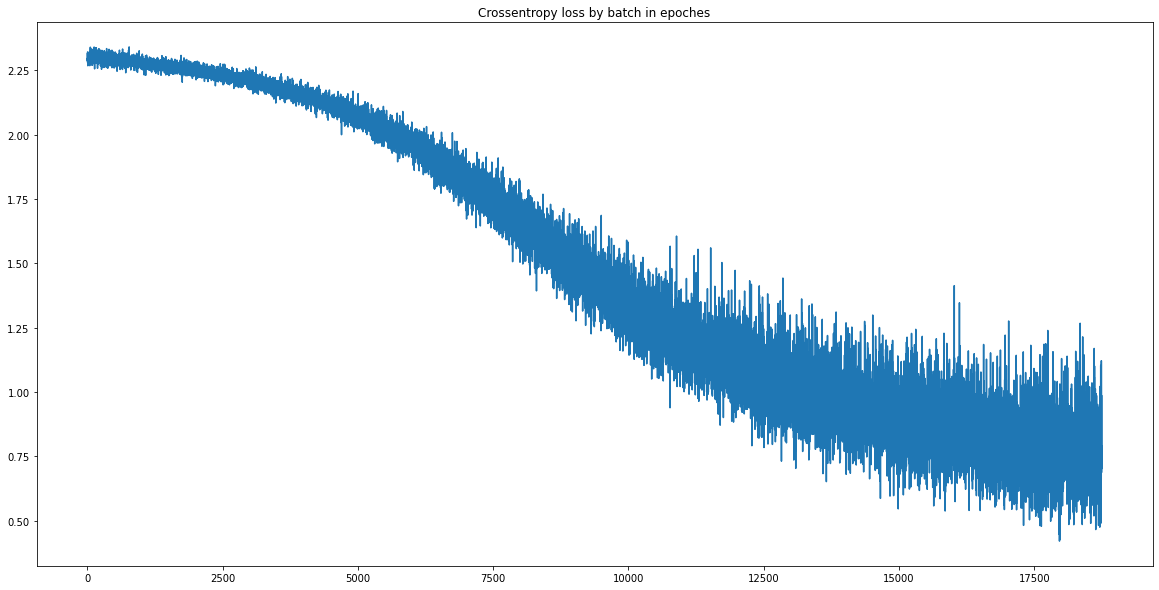

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Crossentropy loss by batch in epoches")
plt.plot(history.flatten())